In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("avocado.csv",sep=',',index_col=0)
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# EDA

In [3]:
df.shape  # checking the rows and cols count

(18249, 13)

In [4]:
df.columns # checking the various cols

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
df.dtypes # checking the datatypes of cols

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Key Observations here

1. Mean and median in columns totalvolume, 4046,large bags,Xlarge bags are very far.
2.  also , there is huge difference in 75% and max values. 
Outliers are present

In [7]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [8]:
df.isnull() # checking for any null values

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum() # null  values column wise counts

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

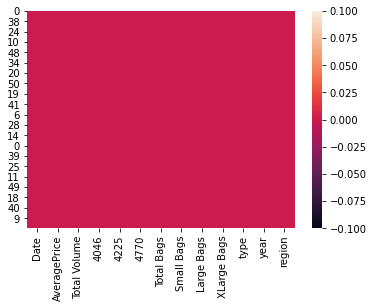

In [10]:
sns.heatmap(df.isnull())

heatmap shows there are no null values in the data

In [11]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [13]:
df["region"].value_counts()

BuffaloRochester       338
GrandRapids            338
BaltimoreWashington    338
Atlanta                338
Southeast              338
Boston                 338
Tampa                  338
Albany                 338
Portland               338
Seattle                338
HarrisburgScranton     338
StLouis                338
Columbus               338
SouthCarolina          338
NorthernNewEngland     338
NewOrleansMobile       338
Spokane                338
Pittsburgh             338
Syracuse               338
Denver                 338
California             338
GreatLakes             338
DallasFtWorth          338
NewYork                338
Indianapolis           338
Charlotte              338
LasVegas               338
Plains                 338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
Orlando                338
Houston                338
SouthCentral           338
SanDiego               338
LosAngeles             338
PhoenixTucson          338
M

# REMOVING some irrelevant variables in respect to target variable REGION for CLASSIFICATION and target variable AVERAGE PRICE for REGRESSION

1. date , 4 variables of bag size i.e totalbags,largebags,xlargebags,smallbags
2.  because these values will not affect the region and Av. price. as total no. of avacados sold with their PLU are stored in diff variables. so dropping them

In [14]:
df.drop(["Date","Total Bags","Small Bags","Large Bags","XLarge Bags"],axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico
8,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico
9,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico
10,1.93,16205.22,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico


# transforming nominal values to numerical so as to get the better bivariate analysis and correlation between variables.

#transforming the categorical variables to numerical for data modelling using LabelEncoder



In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
df["region"]=le.fit_transform(df["region"])
df["type"]=le.fit_transform(df["type"])
df["year"]=le.fit_transform(df["year"])

df.head(20)

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,0,0,0
5,1.26,55979.78,1184.27,48067.99,43.61,0,0,0
6,0.99,83453.76,1368.92,73672.72,93.26,0,0,0
7,0.98,109428.33,703.75,101815.36,80.00,0,0,0
8,1.02,99811.42,1022.15,87315.57,85.34,0,0,0
9,1.07,74338.76,842.40,64757.44,113.00,0,0,0


In [17]:
df["type"].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [18]:
df["region"].value_counts()

47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64

In [19]:
df["year"].value_counts()

2    5722
1    5616
0    5615
3    1296
Name: year, dtype: int64

# check the correlation

In [20]:
df_cor=df.corr()
df_cor

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.210027,-0.036531,0.095252
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,1.000000,-0.000032,-0.000280
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,-0.000032,1.000000,-0.000055
region,-0.011716,0.174176,0.192073,0.145726,0.095252,-0.000280,-0.000055,1.000000


<AxesSubplot:>

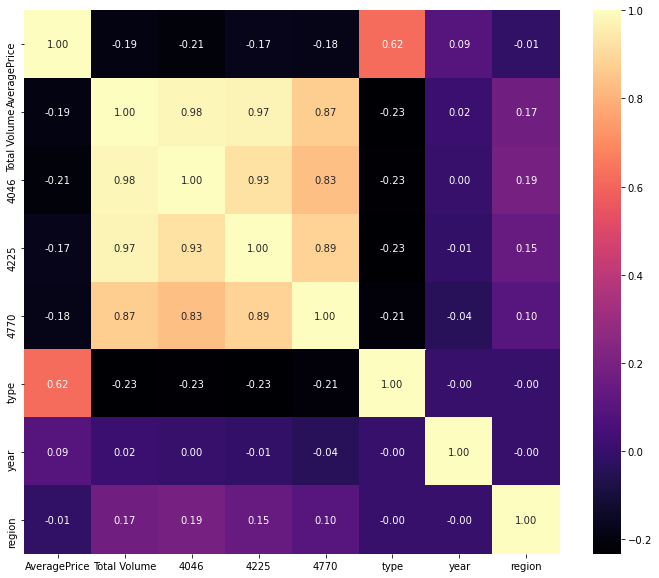

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

1. Variables Total Volume and Product units are positively correlated
2. Average price is negatively correlated with target variable region in Classification
3. Total Volume and all product units are negatively correlated with target variable Average Price in regression

# Data Visualization

Univariate Analysis


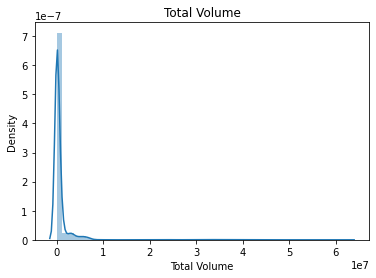

In [22]:
sns.distplot(df["Total Volume"])
plt.title("Total Volume")
plt.show()

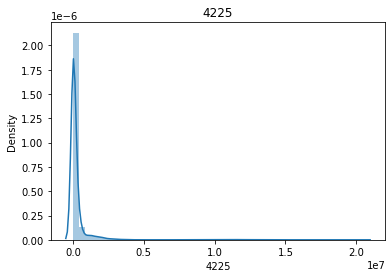

In [23]:
sns.distplot(df["4225"])
plt.title("4225")
plt.show()

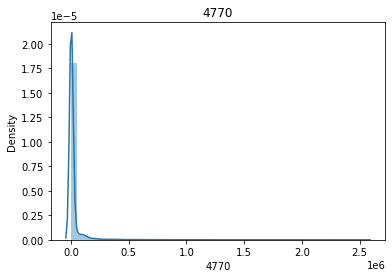

In [24]:
sns.distplot(df["4770"])
plt.title("4770")
plt.show()

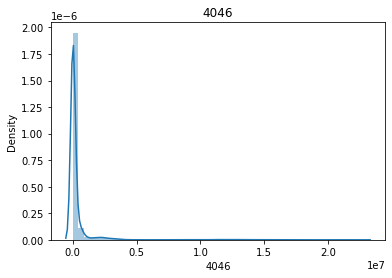

In [25]:
sns.distplot(df["4046"])
plt.title("4046")
plt.show()

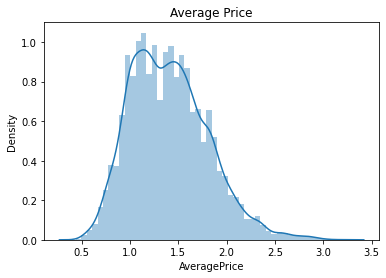

In [26]:
sns.distplot(df["AveragePrice"])
plt.title("Average Price")
plt.show()

In [27]:
#univariate analysis suggests the variables are positively skewed and not normalised

In [28]:
# bivariate analysis to check relationship of features with target variable

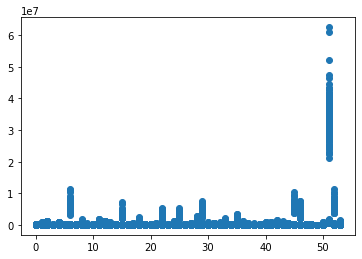

In [29]:
plt.scatter(df["region"],df["Total Volume"]) # correlation when target variable is region

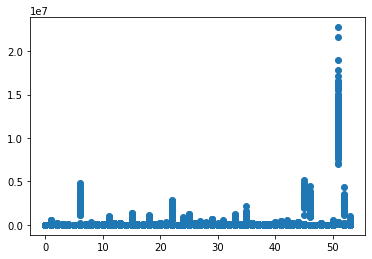

In [30]:
plt.scatter(df["region"],df["4046"])# correlation when target variable is region

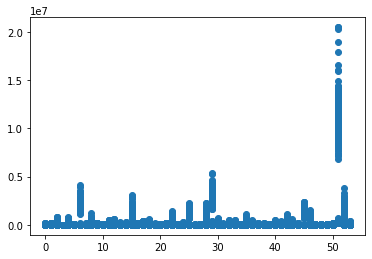

In [31]:
plt.scatter(df["region"],df["4225"])# correlation when target variable is region

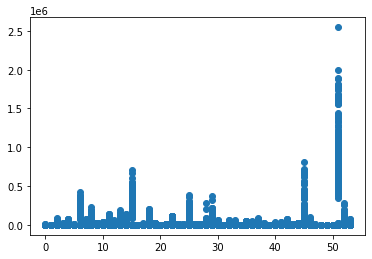

In [32]:
plt.scatter(df["region"],df["4770"])# correlation when target variable is region

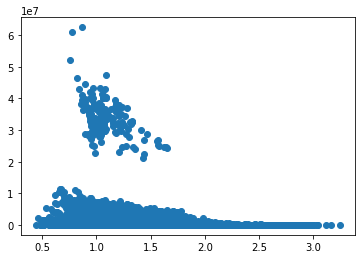

In [33]:
plt.scatter(df["AveragePrice"],df["Total Volume"])# correlation when target variable is AveragePrice

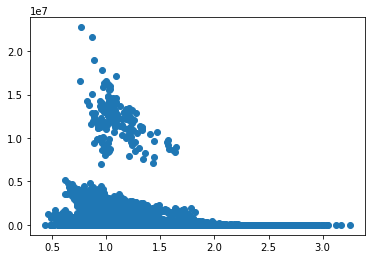

In [34]:
plt.scatter(df["AveragePrice"],df["4046"])# correlation when target variable is AveragePrice

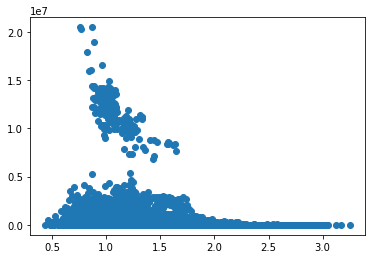

In [35]:
plt.scatter(df["AveragePrice"],df["4225"])# correlation when target variable is AveragePrice

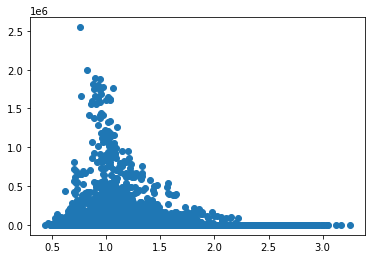

In [36]:
plt.scatter(df["AveragePrice"],df["4770"])# correlation when target variable is AveragePrice

# plotting the outliers

<AxesSubplot:>

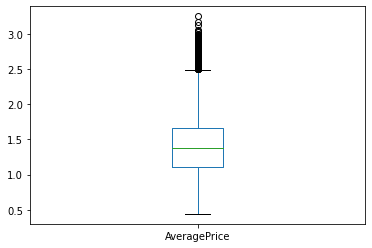

In [37]:
df["AveragePrice"].plot.box()

<AxesSubplot:>

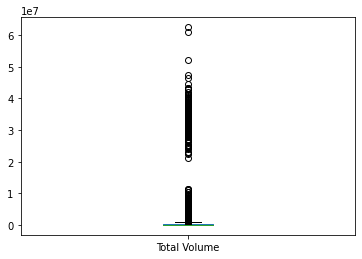

In [38]:
df["Total Volume"].plot.box()

<AxesSubplot:>

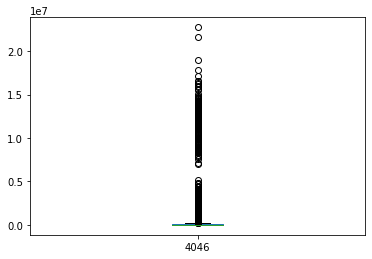

In [39]:
df["4046"].plot.box()

<AxesSubplot:>

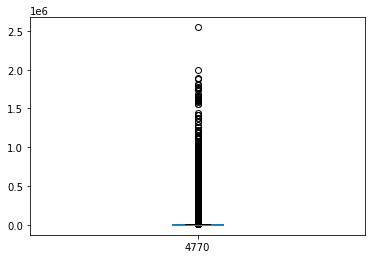

In [40]:
df["4770"].plot.box()

<AxesSubplot:>

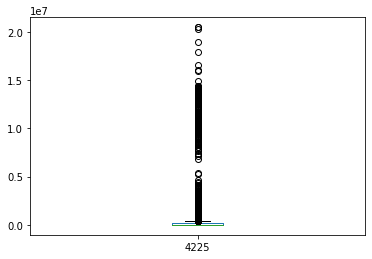

In [41]:
df["4225"].plot.box()

All the above boxplot shows the outliers are present 

In [42]:
from scipy.stats import zscore

In [43]:
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))

(array([  346,   359,   783,   787,   788,   790,   791,   792,   794,
         795,   796,   797,   799,   803,   805,   807,   808,   809,
         812,   816,   820,   823,   827,  1334,  1347,  1516,  1518,
        1541,  2340,  2341,  2348,  2351,  2368,  2370,  2652,  2652,
        2652,  2652,  2653,  2653,  2653,  2653,  2654,  2654,  2654,
        2654,  2655,  2655,  2655,  2655,  2656,  2656,  2656,  2656,
        2657,  2657,  2657,  2657,  2658,  2658,  2658,  2658,  2659,
        2659,  2659,  2659,  2660,  2660,  2660,  2660,  2661,  2661,
        2661,  2661,  2662,  2662,  2662,  2662,  2663,  2663,  2663,
        2663,  2664,  2664,  2664,  2664,  2665,  2665,  2665,  2665,
        2666,  2666,  2666,  2666,  2667,  2667,  2667,  2667,  2668,
        2668,  2668,  2668,  2669,  2669,  2669,  2669,  2670,  2670,
        2670,  2670,  2671,  2671,  2671,  2671,  2672,  2672,  2672,
        2672,  2673,  2673,  2673,  2673,  2674,  2674,  2674,  2674,
        2675,  2675

In [44]:
df_new=df[(z<3).all(axis=1)]

In [45]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,0,0,0
...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,1,3,53
8,1.71,13888.04,1191.70,3431.50,0.00,1,3,53
9,1.87,13766.76,1191.92,2452.79,727.94,1,3,53
10,1.93,16205.22,1527.63,2981.04,727.01,1,3,53


In [46]:
# extracting our input  Variables  and output variable(region) to train the model

In [47]:
x=df_new.iloc[:,0:-1]
x.shape

(17838, 7)

In [48]:
y=df_new.iloc[:,-1]
y.shape

(17838,)

# To check the distribution of skewness

In [49]:
df_new.skew()  # shows values sold have highly skewed data

AveragePrice    0.385429
Total Volume    3.661159
4046            4.422120
4225            4.104196
4770            4.759495
type           -0.016371
year            0.221195
region          0.012062
dtype: float64

In [50]:
# removing skewness by transforming data
from sklearn.preprocessing import power_transform

In [51]:
x=power_transform(x,method='yeo-johnson')

# Model Training

Logistic REgression

In [52]:
# scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

In [53]:
# importing our model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [55]:
# breaking out input and output variable into train and test data
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.22,random_state=43)

In [56]:
#using algorithms in for loops
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Accuracy score of " , m , "is " , accuracy_score(y_test,y_pred))
    print("confusion matrix of " , m , "is \n",confusion_matrix(y_test,y_pred))
    print("classification report of " , m, "is \n",classification_report(y_test,y_pred))
    print("**********************************************************************\n")

Accuracy score of  LogisticRegression() is  0.3997452229299363
confusion matrix of  LogisticRegression() is 
 [[35  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  1]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  1 60  0]
 [ 0 10  0 ...  0  0  5]]
classification report of  LogisticRegression() is 
               precision    recall  f1-score   support

           0       0.42      0.51      0.46        69
           1       0.23      0.33      0.27        78
           2       0.35      0.53      0.42        60
           3       0.32      0.39      0.35        71
           4       0.32      0.33      0.33        75
           5       0.64      0.60      0.62        78
           6       0.47      0.69      0.56        61
           7       0.53      0.69      0.60        88
           8       0.41      0.50      0.45        66
           9       0.32      0.58      0.42        65
          10       0.38      0.27      0.32        70
          11       0.33      0.33

# Conclusion

RandomForestClassifer is performing best among all above with accuaracy score .85. 

# Saving the model- Serialization

In [57]:
# saving the prediction model

import pickle
filename="AvacadoData.pkl"
pickle.dump(y_pred,open(filename,'wb'))

# Classification done with target variable - REGION

# Now , we will do model training and validation for target variable Average price through Regression 

In [58]:
# extracting our input  Variables  and output variable(region) to train the model

In [59]:
df_x=df_new.drop(columns=['AveragePrice'])

In [60]:
y_t=pd.DataFrame(df_new['AveragePrice'])

In [61]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(df_x)
x_t=pd.DataFrame(x_t,columns=df_x.columns)

finding best random state

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [65]:
from sklearn.linear_model import LinearRegression
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y_t,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    predlr=mod.predict(x_test)
    tempaccu=r2_score(y_test,predlr)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 43.18499306104998 Random state 159


In [66]:
# breaking out input and output variable into train and test data
x_train,x_test,y_train,y_test=train_test_split(x_t,y_t,test_size=.22,random_state=159)

In [67]:
print(x_train.shape , '\t'  , y_train.shape)

(13913, 7) 	 (13913, 1)


In [68]:
print(x_test.shape , '\t'  , y_test.shape)

(3925, 7) 	 (3925, 1)


In [69]:
# importing our model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [70]:
#using algorithms in for loops
model=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print("Score of " , m , "is" , m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print("Mean Absolute error  " , mean_absolute_error(y_test,y_pred))
    print("Mean Squared error \n",mean_squared_error(y_test,y_pred))
    print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("r2 score " , r2_score(y_test,y_pred))
    print("**********************************************************************\n")

Score of  LinearRegression() is 0.40517209984220404
Mean Absolute error   0.2328497040383857
Mean Squared error 
 0.08819405972959035
Root mean Squared error is 
 0.29697484696450366
r2 score  0.42960376814656986
**********************************************************************

Score of  RandomForestRegressor() is 0.9758999446987099
Mean Absolute error   0.11105057324840766
Mean Squared error 
 0.02407196371210191
Root mean Squared error is 
 0.15515142188230796
r2 score  0.8443142606566206
**********************************************************************

Score of  KNeighborsRegressor() is 0.8926268911365013
Mean Absolute error   0.10950165605095541
Mean Squared error 
 0.023871827770700637
Root mean Squared error is 
 0.15450510596967543
r2 score  0.8456086424685447
**********************************************************************

Score of  GradientBoostingRegressor() is 0.6588361904447797
Mean Absolute error   0.17223634723019715
Mean Squared error 
 0.0517948194950

# Hyperparameter tuning

In [72]:
# randomForestRegressor is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [73]:
# Create the parameter grid based on the results of random search 
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [74]:
rfr = RandomForestRegressor(random_state = 159)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [75]:
g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}


In [76]:
# using RandomForestRegressor with best parameters
rf=RandomForestRegressor(max_depth=None,bootstrap=True,n_estimators=15)
rf.fit(x_train,y_train)
print(" Score is ",rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print("Mean Absolute error  " , mean_absolute_error(y_test,predrf))
print("Mean Squared error \n",mean_squared_error(y_test,predrf))
print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,predrf)))
print("r2 score " , r2_score(y_test,predrf))
print("**********************************************************************\n")

 Score is  0.9688420818401776
Mean Absolute error   0.11617596602972399
Mean Squared error 
 0.026818761104033965
Root mean Squared error is 
 0.1637643462541037
r2 score  0.8265493126904346
**********************************************************************



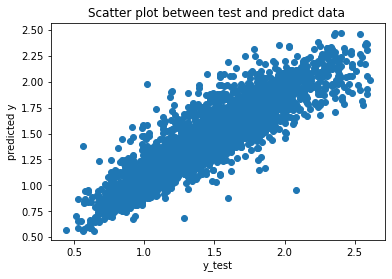

In [77]:
#plotting scatter between test data and predict data
plt.scatter(y_test,predrf)
plt.xlabel("y_test")
plt.ylabel("predicted y")
plt.title("Scatter plot between test and predict data ")
plt.show()

# Conclusion
RandomForestRegressor is performing best among all above with  score .97

In [78]:
# saving the prediction model

import pickle
filename="Avacado_AvPrice.pkl"
pickle.dump(predrf,open(filename,'wb'))